<h1> <strong> Tarefa 4: Fourier e o espaço recíproco </strong> </h1>
<p> Antonio Pilan. NUSP: 10562611 </p>

<h3>Ferramentas: OpenCV, Matplotlib e Numpy</h3>

<p>
Nessa tarefa, vamos explorar o conceito de transformadas de Fourier para o espaço recíproco, entender as operações e filtros que podemos fazer nesse espaço e fazer a transformada inversa para nossa imagem original
</p>

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import show_image

<h3>Imagem</h3>

<p>
    Vamos usar a clássica imagem que venho usando em outras atividades e usar a ferramenta de FFT do próprio NUMPY:
</p>

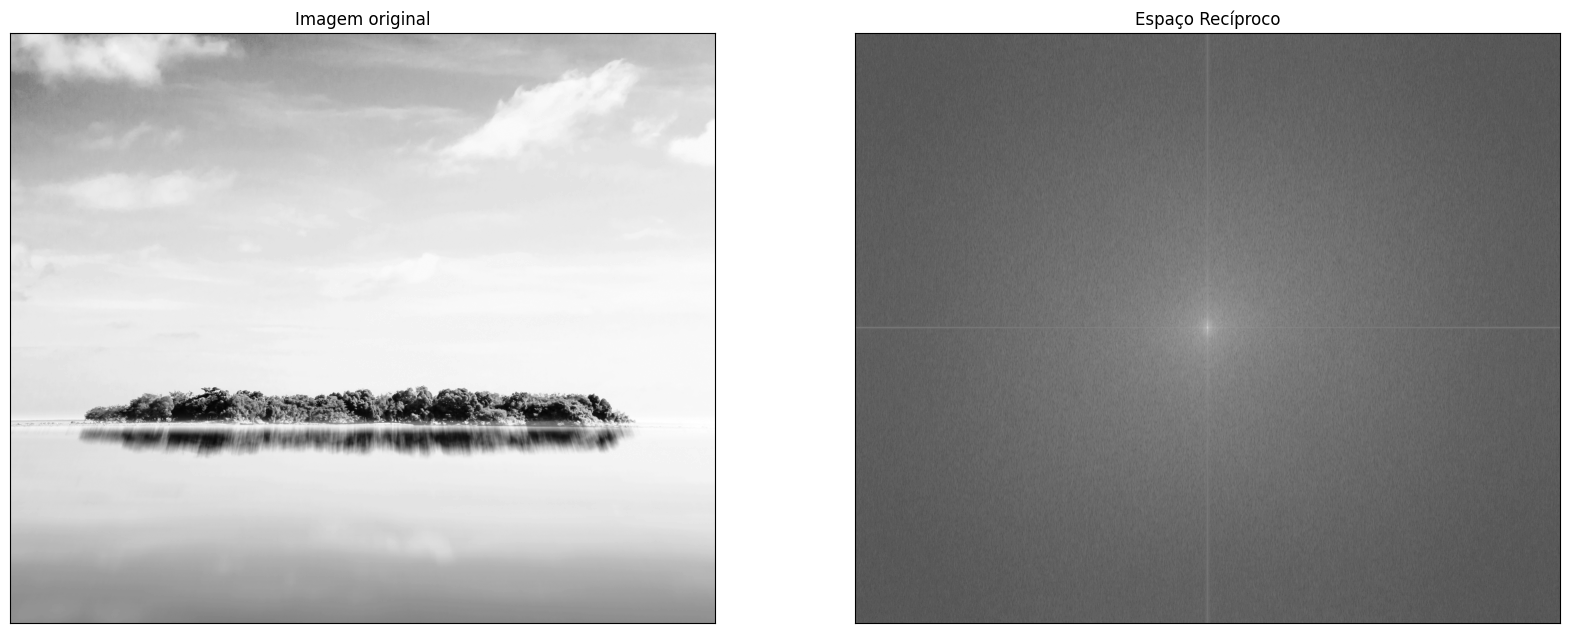

In [52]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando
magnitude_spectrum = 20*np.log(np.abs(f_shift))

#PLOT
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espaço Recíproco'), plt.xticks([]), plt.yticks([])
plt.show()

Conseguimos ver acima a imagem e seu espaço recíproco, agora vamos analisar como é voltar para o domínio espacial da imagem usando a transformada inversa de Fourier desfazendo o shift e realizando a ifft:

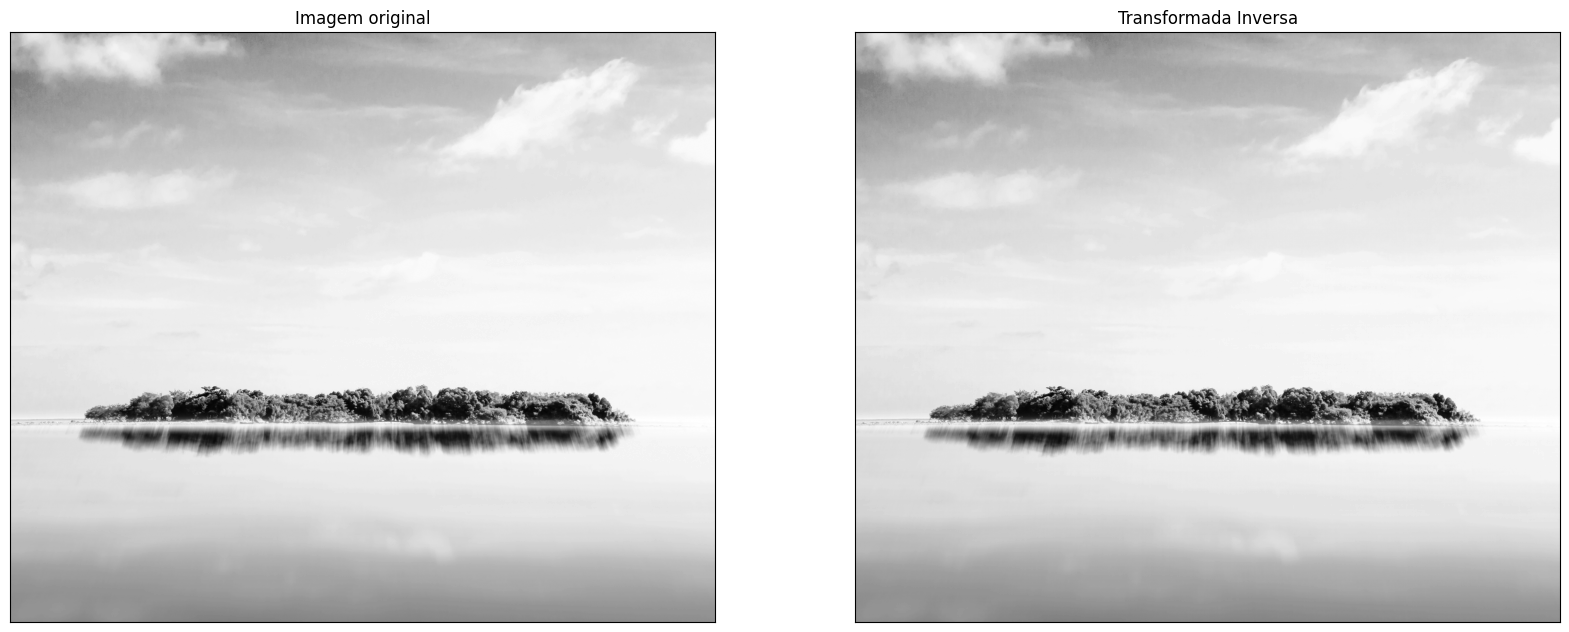

In [53]:
f_unshift = np.fft.ifftshift(f_shift) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_ifft_numpy, cmap='gray')
plt.title('Transformada Inversa'), plt.xticks([]), plt.yticks([])

plt.show()

Percebemos que a imagem retorna ao original, exatamente como é esperado. Agora, vamos analisar a transformada inversa caso o shift não fosse desfeito

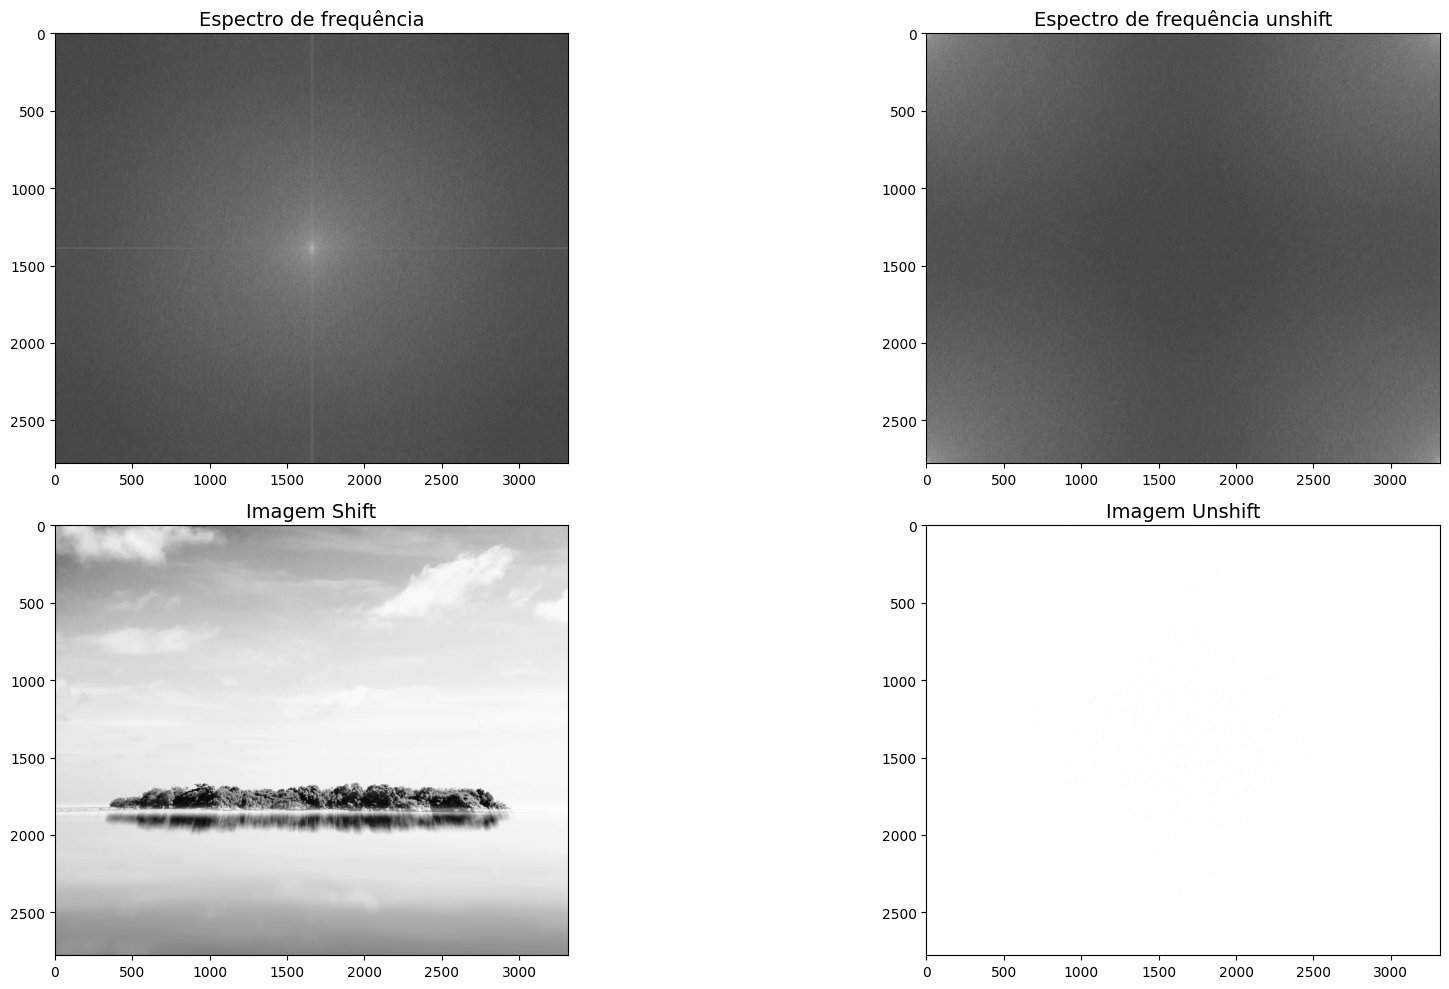

In [54]:
img_ifft = np.fft.ifft2(f_shift, axes=(-2, -1)) #realizando ifft (transformada inversa)
img_ifft_unshift = np.abs(f_unshift).clip(0,255).astype(np.uint8)

magnitude_spectrum = 20*np.log(5+np.abs(f_shift))
magnitude_spectrum_unshift = np.log(5+np.abs(f_unshift))

list_images = [magnitude_spectrum, magnitude_spectrum_unshift, img_ifft_numpy, img_ifft_unshift]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência', 'Espectro de frequência unshift', 'Imagem Shift', 'Imagem Unshift'],
                num_cols=2,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

Ao não desfazer o shift, temos uma imagem com nenhuma alteração de frequência, ou seja, sem nenhuma transição. Por isso temos uma imagem sólida 

Agora, vamos substituir o ponto de menor frequência na imagem por intensidade 0 e analisar o resultado:

C:\Users\anton\AppData\Local\Temp\ipykernel_11664\1823577516.py:7: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 200*np.log(np.abs(f_meio_zero))


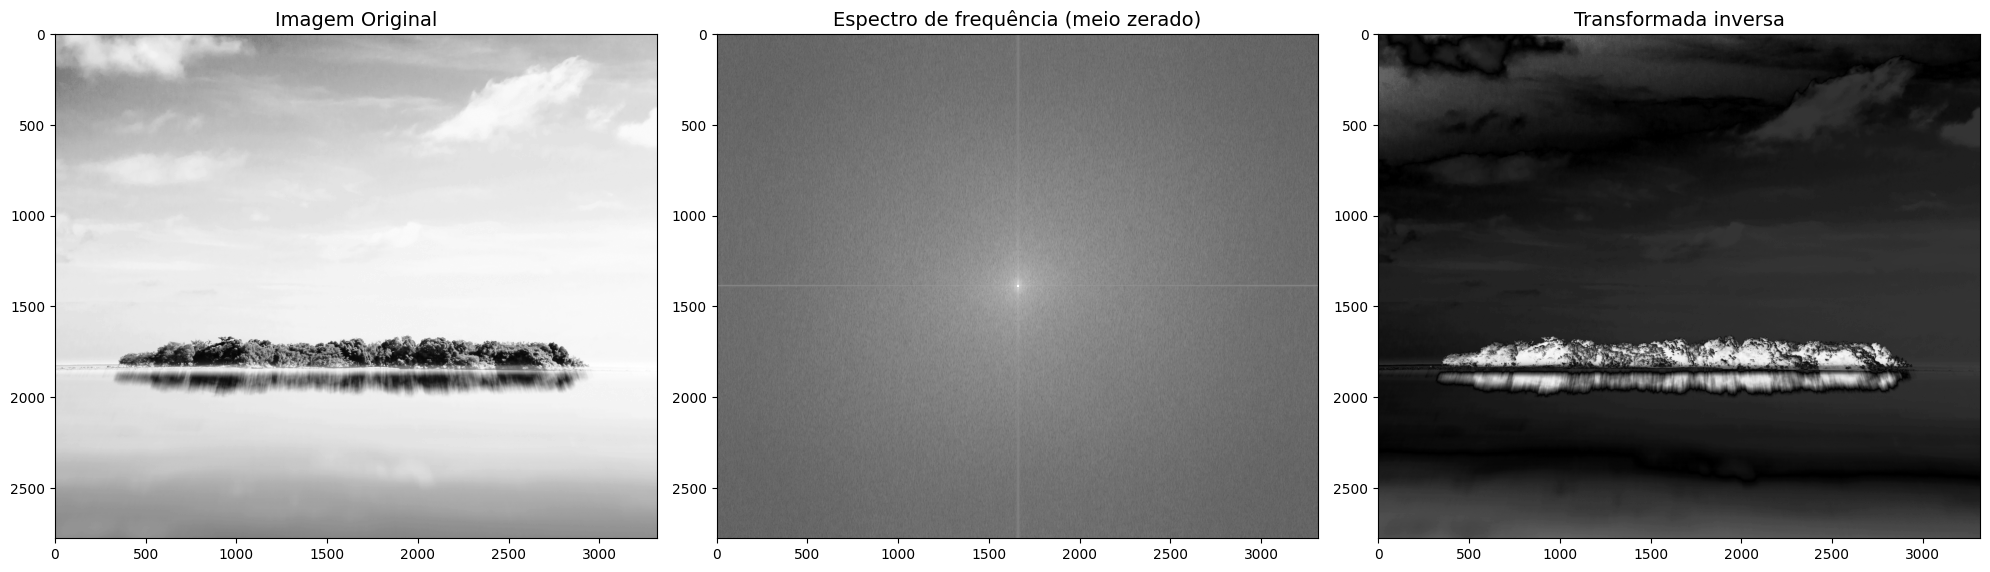

In [55]:
f_meio_zero = f_shift
f_meio_zero[int(row/2)][int(col/2)] = 0 #transformando o ponto central em 0

f_unshift = np.fft.ifftshift(f_meio_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

magnitude_spectrum = 200*np.log(np.abs(f_meio_zero))

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária


list_images = [img, magnitude_spectrum ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Imagem Original', 'Espectro de frequência (meio zerado)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

Vemos que os pontos na imagem de baixa frequência como o céu e mar foram escurecidos enquanto pontos de frequência maior se mantiveram.

Outra observação é que, apesar de não termos mexido em altas frequências, elas ficaram mais intensas ao invés de se preservar e, apesar de termos jogado o valor central pra 0, o ponto central no espectro de frequência aparece branco ao invés de preto

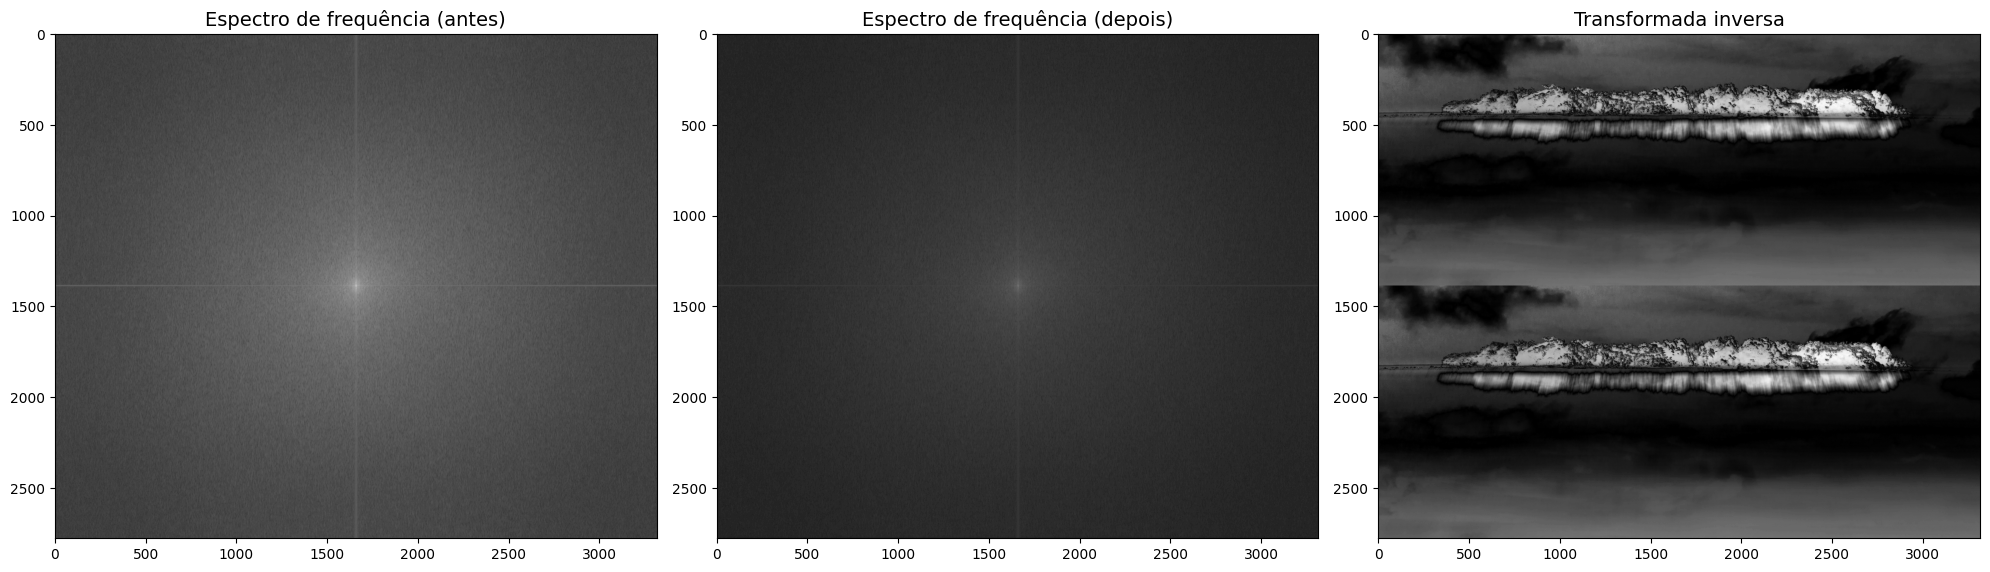

(2778, 3316)
(2778, 3316)


In [56]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(row):
    if (i%2 != 0): #transformando colunas ímpares em 0
        f_impar_zero[i] = 0
    #display(f_impar_zero[i]) DEBUG
    
magnitude_spectrum_after = np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

Nessa transformação, vemos um impacto na intensidade do espaço recíproco. Também temos uma duplicação da imagem

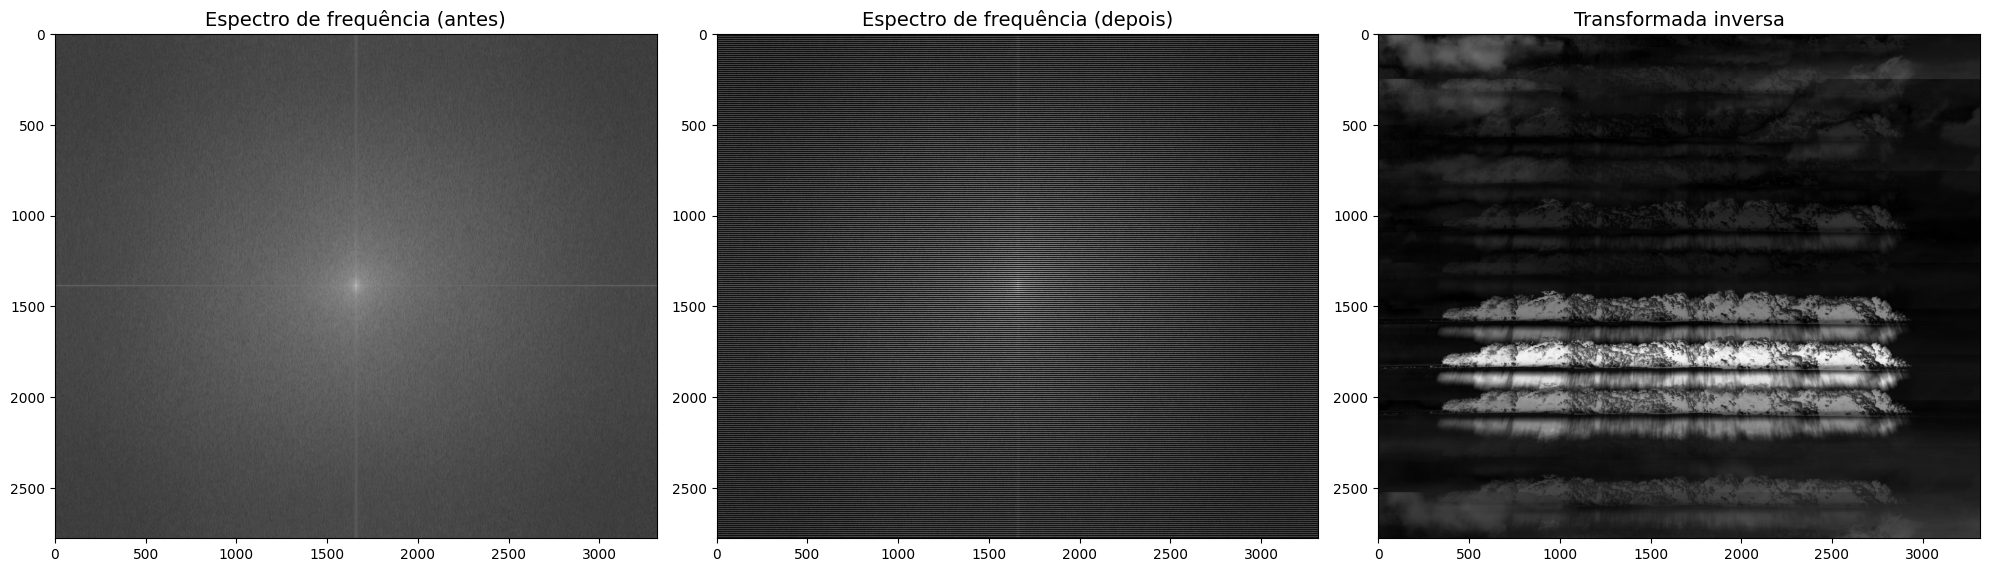

In [57]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_5_zero = f_shift
magnitude_spectrum_before = np.log(15+ np.abs(f_5_zero))

c=0
for i in range(row):
    if c < 5:
        f_5_zero[i] = 0
        c += 1
    elif c >= 5 and c < 10:
        c += 1
    elif c >= 10:
        c = 0
    #display(f_5_zero[i]) #DEBUG
    
    
magnitude_spectrum_after = np.log(15+ np.abs(f_5_zero))

f_unshift = np.fft.ifftshift(f_5_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

Similar de quando removemos as linhas ímpares, no caso tivemos uma replicação mais intensa da transformada inversa

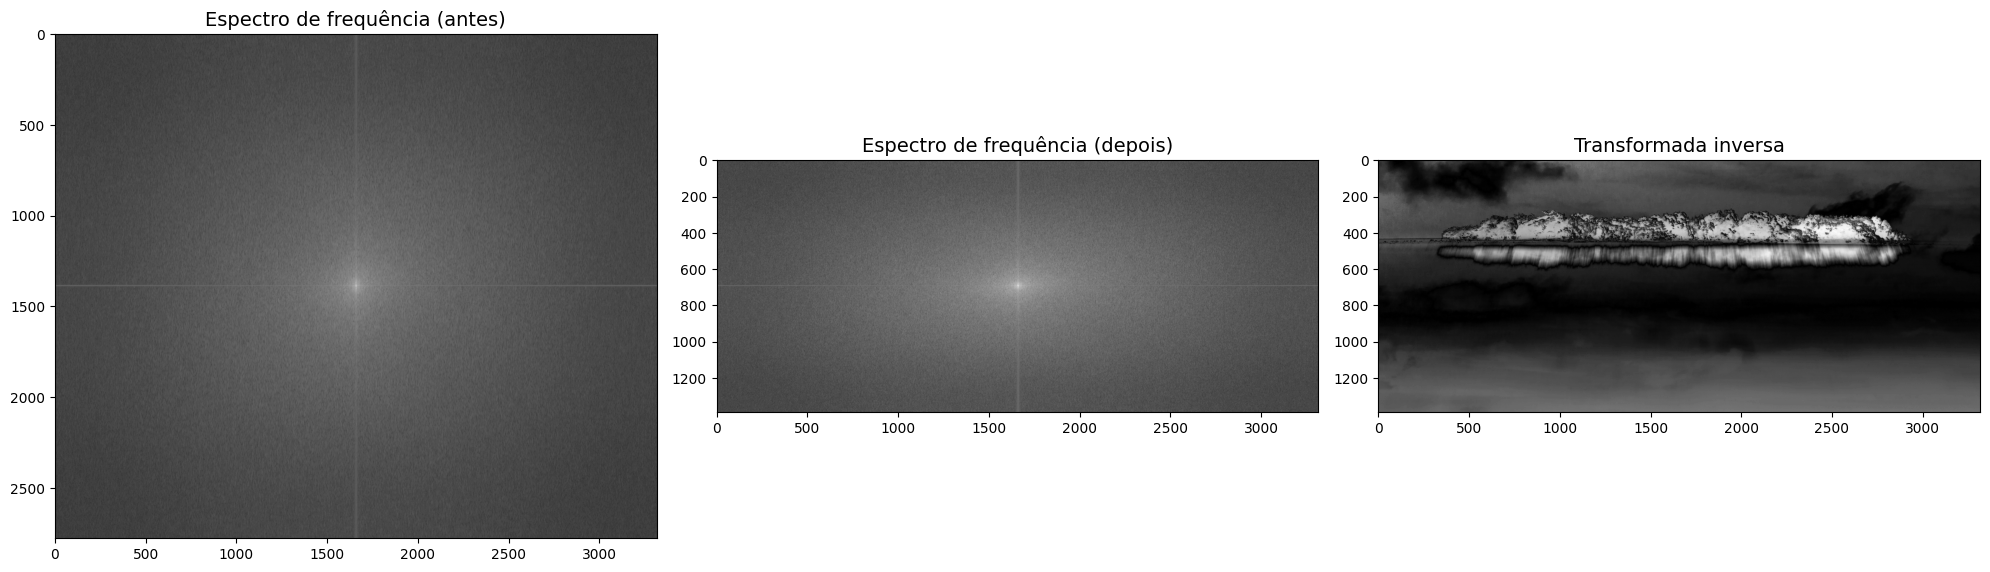

(1389, 3316)
(2778, 3316)


In [58]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_removido = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_removido))

count=0
for i in range(row):
    if (i%2 != 0): #transformando colunas ímpares em 0
        f_impar_removido = np.delete(arr=f_impar_removido,obj= i-count, axis=0)
        count += 1
    #display(f_impar_zero[i]) DEBUG
    
magnitude_spectrum_after = np.log(15+ np.abs(f_impar_removido))

f_unshift = np.fft.ifftshift(f_impar_removido) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

Como afetamos a dimesão vertical do espaço de frequências, também sentimos na nossa transformada inversa. Temos uma diminuição de metade das linhas na dimensão final da imagem

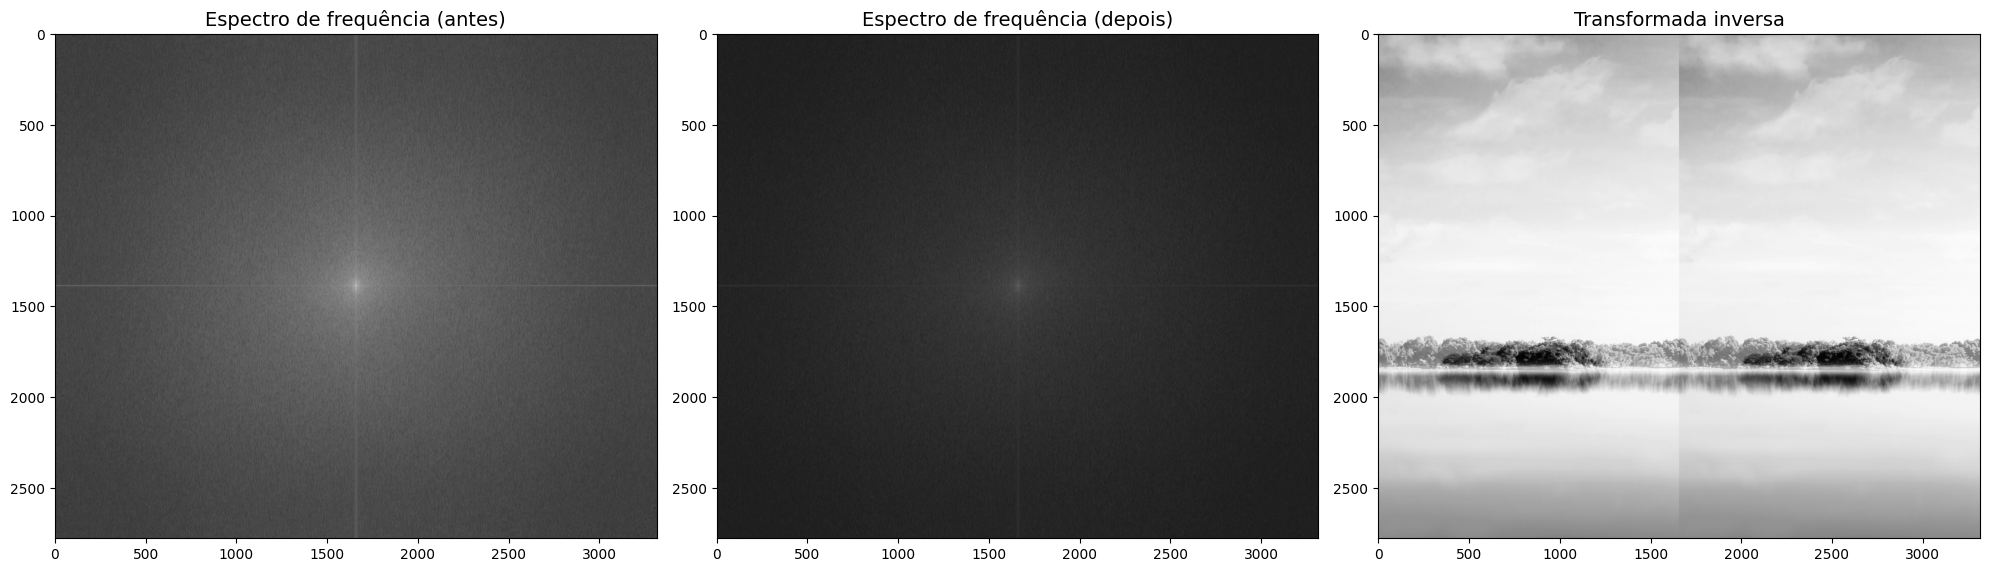

(2778, 3316)
(2778, 3316)


In [59]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(col):
    if (i%2 != 0): #transformando colunas ímpares em 0
        f_impar_zero[:,i] = 0
    #display(f_impar_zero[i]) #DEBUG
    
magnitude_spectrum_after = np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

Quando zeramos colunas invés de linhas, obtivemos a imagem duplicada verticalmente, quando com linhas, ela era duplicada horizontalmente e, curiosamente, não tivemos impacto na exibição de intensidades. Mas tivemos um destaque na região central da imagem, enquanto o resto ligeiramente se apagou

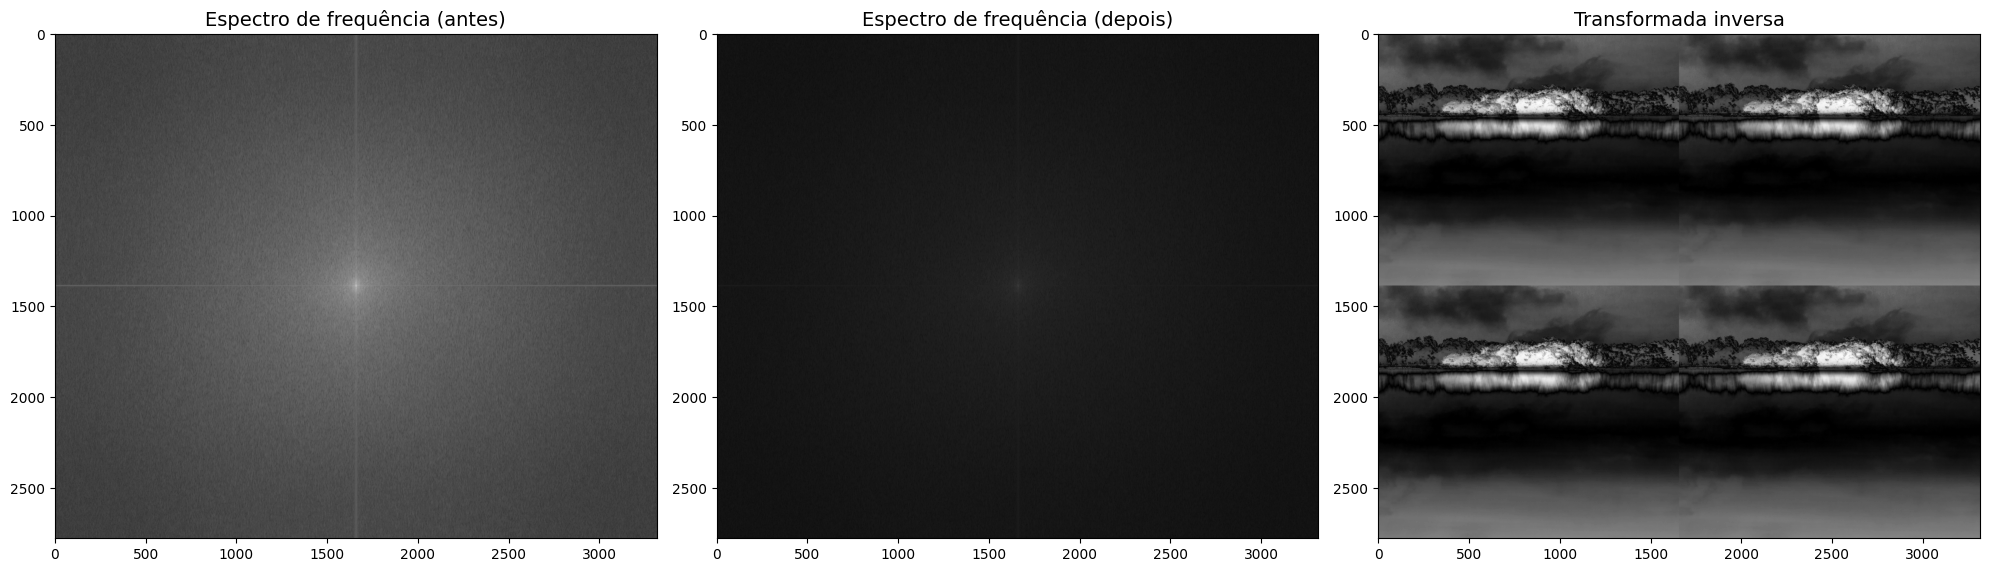

(2778, 3316)
(2778, 3316)


In [60]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(row):
    if (i%2 != 0): #transformando linhas ímpares em 0
        f_impar_zero[i] = 0
    else:
        for j in range(col):
            if (j%2 != 0): #transformando colunas ímpares em 0
                f_impar_zero[i][j] = 0
        
    #display(f_impar_zero[i]) #DEBUG
    
magnitude_spectrum_after = np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

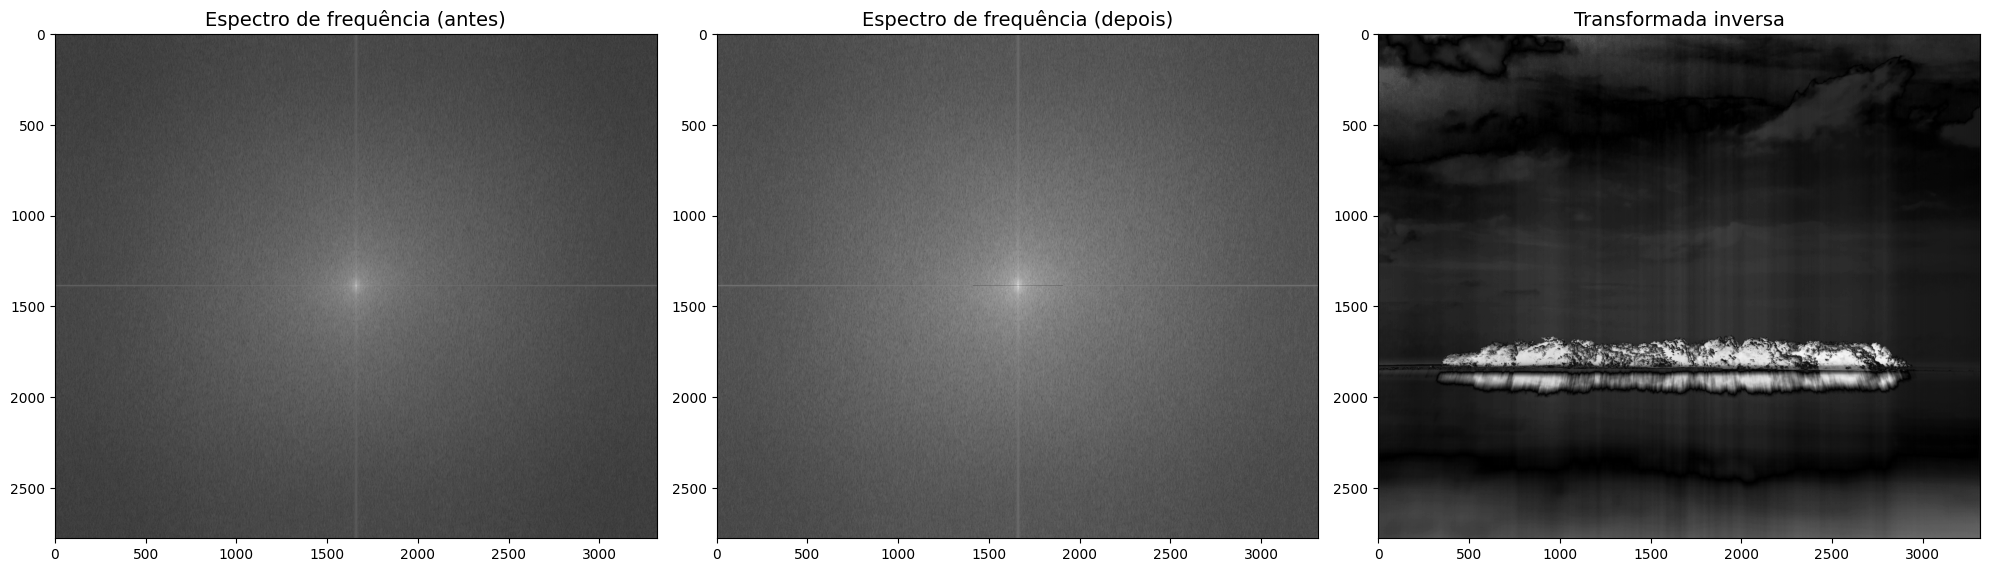

(2778, 3316)
(2778, 3316)


In [61]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(int(col*0.15)):
    f_impar_zero[int(row/2)][i+int(col*0.85/2)] = 0

        
    #display(f_impar_zero[i]) #DEBUG
    
magnitude_spectrum_after = 20*np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

ao inserir uma linha horizontal zerada no espaço de frequências podemos observar artefatos verticais na transformada de Fourier, exatamente pelo por estarmos mexendo em frequências variando nessa direção.

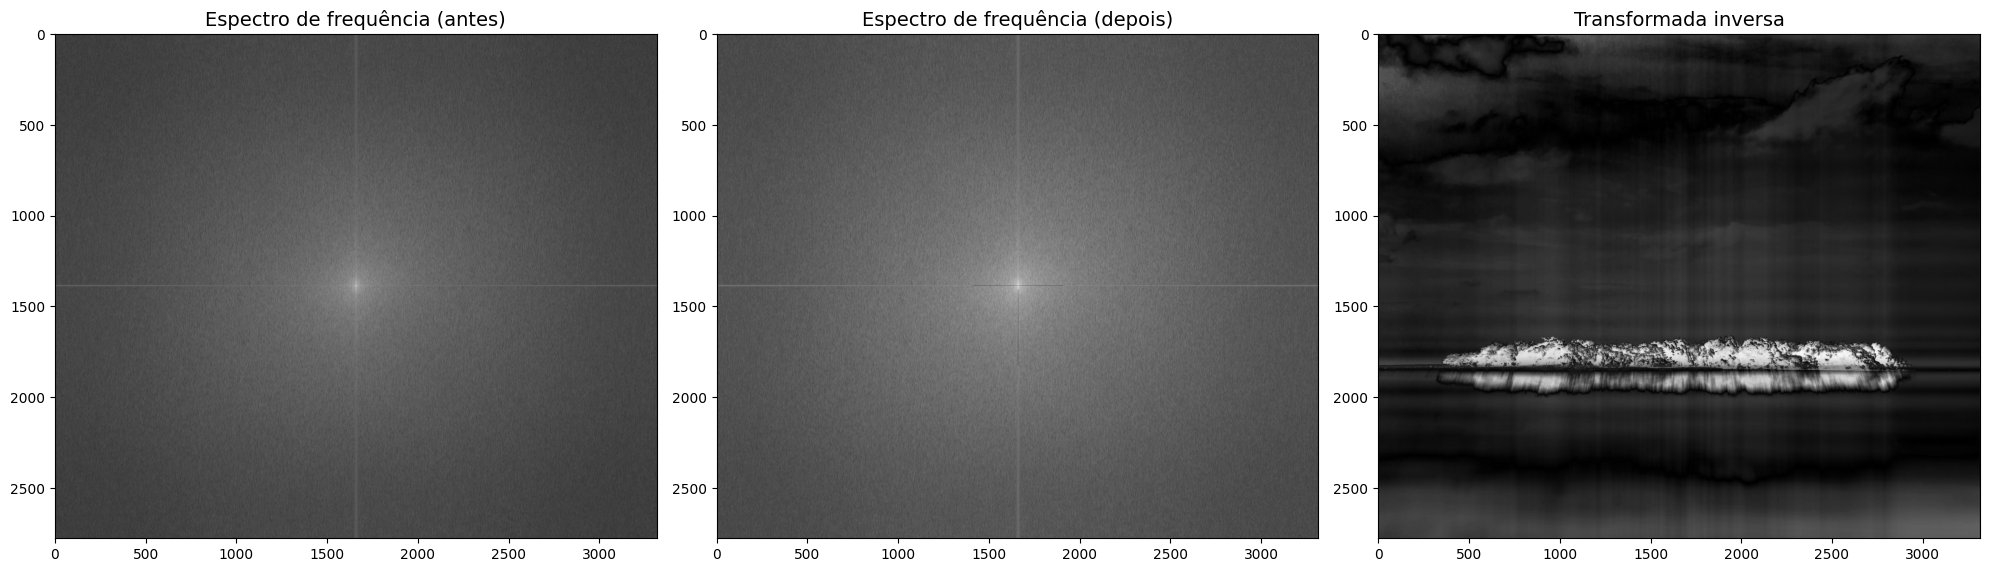

(2778, 3316)
(2778, 3316)


In [62]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(int(col*0.15)):
    f_impar_zero[int(row/2)][i+int(col*0.85/2)] = 0
for i in range(int(row*0.15)):
    f_impar_zero[int(i+int(col*0.85/2))][int(col/2)] = 0


        
    #display(f_impar_zero[i]) #DEBUG
    
magnitude_spectrum_after = 20*np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

se adicionarmos colunas zeradas, vemos os mesmos artefatos aparecerem na horizontal. Se centralizarmos exatamente junto com o cancelamento, obtemos o seguinte padrão:

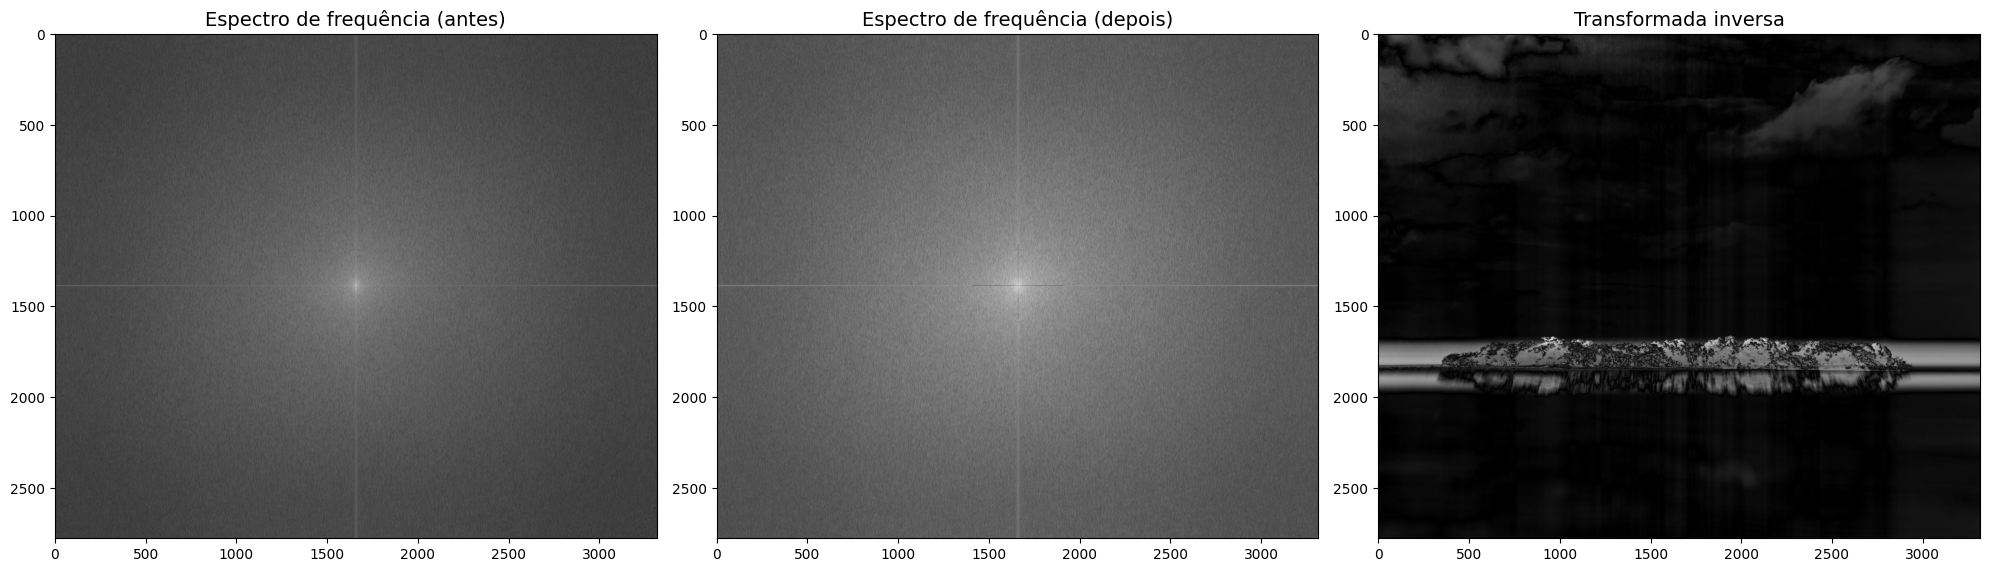

(2778, 3316)
(2778, 3316)


In [63]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_impar_zero = f_shift

magnitude_spectrum_before = np.log(15+ np.abs(f_impar_zero))

for i in range(int(col*0.15)):
    f_impar_zero[int(row/2)][i+int(col*0.85/2)] = 0
for i in range(int(row*0.15)):
    f_impar_zero[int(i+int(col*0.70/2))][int(col/2)] = 0


        
    #display(f_impar_zero[i]) #DEBUG
    
magnitude_spectrum_after = 20*np.log(15+ np.abs(f_impar_zero))

f_unshift = np.fft.ifftshift(f_impar_zero) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)

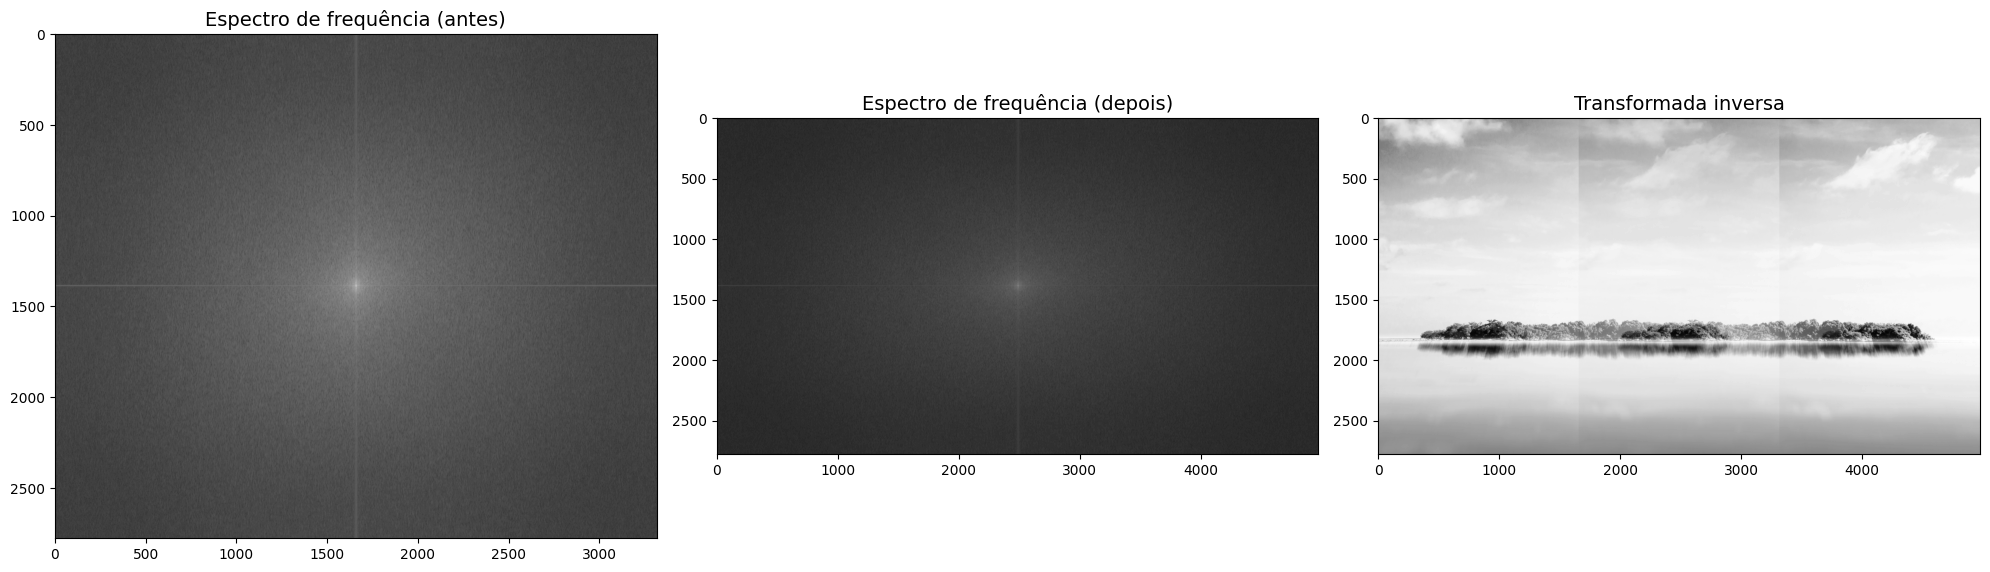

(2778, 4974)
(2778, 3316)


In [89]:
img = cv.imread('img_tarefa1.jpg',0) 
row, col = img.shape


#TRANSFORMADA DE FOURIER
f = np.fft.fft2(img) #realizando fft
f_shift = np.fft.fftshift(f) #shift centralizando

f_add_0 = f_shift


magnitude_spectrum_before = np.log(15+ np.abs(f_add_0))

count=0
for i in range(col):
    if (i%2 != 0): #transformando colunas ímpares em 0
        zarray = np.zeros(row)
        f_add_0 = np.insert(f_add_0, i+count, zarray, axis=1)
        count += 1
        #print(f_add_0.shape)
        
    
magnitude_spectrum_after = np.log(15+ np.abs(f_add_0))

f_unshift = np.fft.ifftshift(f_add_0) #shift descentralizando
img_ifft = np.fft.ifft2(f_unshift, axes=(-2, -1)) #realizando ifft (transformada inversa)

img_ifft_numpy = np.abs(img_ifft).clip(0,255).astype(np.uint8) #módulo para computar fase imaginária

list_images = [magnitude_spectrum_before, magnitude_spectrum_after ,img_ifft_numpy]

show_image.show_image_list(list_images=list_images, 
                list_titles=['Espectro de frequência (antes)', 'Espectro de frequência (depois)', 'Transformada inversa'],
                num_cols=3,
                figsize=(20, 10),
                grid=False,
                title_fontsize=14)

print(magnitude_spectrum_after.shape)
print(magnitude_spectrum_before.shape)